In [13]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

## Load

In [14]:
iris_data = pd.read_csv('C:/Users/IRIS.csv', header=0)

## Preparing dataset

In [15]:
X = iris_data.loc[:, iris_data.columns != 'species']
y = iris_data.loc[:, ['species']]

In [16]:
y_enc = LabelEncoder().fit_transform(y)
y_label = tf.keras.utils.to_categorical(y_enc)

c:\Users\CONDA\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.3)

In [18]:
type(y_train)

numpy.ndarray

In [19]:
def get_model():
    model = Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(500, activation='relu',),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation='softmax')
    ])
    
    return model

In [20]:
model = get_model()

# Compile the model
model.compile(optimizer='adam', 
              loss=keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30


4/4 [==============================] - 1s 73ms/step - loss: 0.9297 - accuracy: 0.5048 - val_loss: 0.7361 - val_accuracy: 0.6222
Epoch 2/30
4/4 [==============================] - 0s 22ms/step - loss: 0.6256 - accuracy: 0.7810 - val_loss: 0.4542 - val_accuracy: 0.7333
Epoch 3/30
4/4 [==============================] - 0s 24ms/step - loss: 0.5309 - accuracy: 0.7048 - val_loss: 0.3071 - val_accuracy: 0.9778
Epoch 4/30
4/4 [==============================] - 0s 23ms/step - loss: 0.4290 - accuracy: 0.7714 - val_loss: 0.2308 - val_accuracy: 0.9778
Epoch 5/30
4/4 [==============================] - 0s 22ms/step - loss: 0.4601 - accuracy: 0.7524 - val_loss: 0.2454 - val_accuracy: 0.9333
Epoch 6/30
4/4 [==============================] - 0s 24ms/step - loss: 0.3230 - accuracy: 0.8857 - val_loss: 0.1746 - val_accuracy: 0.9556
Epoch 7/30
4/4 [==============================] - 0s 25ms/step - loss: 0.2967 - accuracy: 0.8667 - val_loss: 0.1983 - val_accuracy: 0.9333
Epoch 8/30
4/4 [======================

In [22]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.0307 - accuracy: 1.0000


[0.030654070898890495, 1.0]

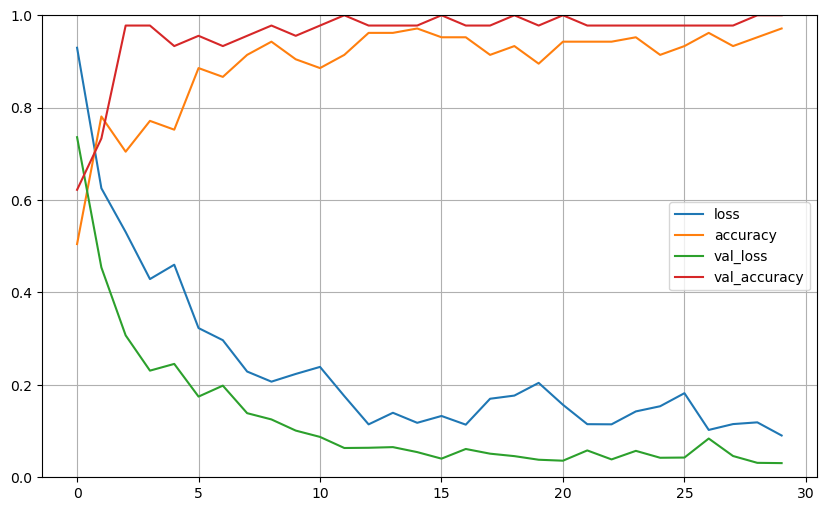

In [23]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [25]:
from dvclive import Live
from dvclive.keras import DVCLiveCallback

with Live("plots") as live:
    history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1, callbacks=[DVCLiveCallback(live=live)])

    # Log additional data after training
    test_loss, test_acc = model.evaluate(X_test, y_test)
    live.log_metric("test_loss", test_loss, plot=False)
    live.log_metric("test_acc", test_acc, plot=False)

Epoch 1/30
4/4 [==============================] - 0s 59ms/step - loss: 0.0856 - accuracy: 0.9714 - val_loss: 0.0340 - val_accuracy: 0.9778
Epoch 2/30
4/4 [==============================] - 0s 39ms/step - loss: 0.0854 - accuracy: 0.9619 - val_loss: 0.0251 - val_accuracy: 1.0000
Epoch 3/30
4/4 [==============================] - 0s 56ms/step - loss: 0.0934 - accuracy: 0.9524 - val_loss: 0.0190 - val_accuracy: 1.0000
Epoch 4/30
4/4 [==============================] - 0s 57ms/step - loss: 0.1042 - accuracy: 0.9714 - val_loss: 0.0239 - val_accuracy: 0.9778
Epoch 5/30
4/4 [==============================] - 0s 63ms/step - loss: 0.1040 - accuracy: 0.9429 - val_loss: 0.0194 - val_accuracy: 1.0000
Epoch 6/30
4/4 [==============================] - 0s 86ms/step - loss: 0.0810 - accuracy: 0.9714 - val_loss: 0.0223 - val_accuracy: 0.9778
Epoch 7/30
4/4 [==============================] - 0s 78ms/step - loss: 0.0843 - accuracy: 0.9714 - val_loss: 0.0189 - val_accuracy: 1.0000
Epoch 8/30
4/4 [===========